# Project: Investigate a Dataset: No-Show Appointment Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil. It is primarily focused on whether or not patients show up for their scheduled appointment. In this project we will be analyzing factors that may have direct correlation to patient no-shows in order to identify trends in patients that attend their appointments and how those differ from patients who do not show for their appointments.

>The charateristics included as columns in the data set are as follows: Patient ID, Appointment ID, Gender, Appointment Date, Date Appointment Was Made, Patient Age, Appointment Location, Welfare Program Recipeint, Hypertension, Diabetes, Alocholism, Handicap, SMS Recieved, No Show (note the column names are translated/expanded in this list for explanation of data being collected/evaluated.

### Question(s) for Analysis
>Does the location of the appoinment (as Neighbourhood in dataset) have any correlation to the number of patients that do not show for their appointments(as No-show in dataset)?

>Is there a particular age group that is more likely to not show for their appointment?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
>First an overview of the database and statistical information is performed in order to evaluate the need for data cleaning and identify variables available for analysis.

In [2]:
df = pd.read_csv(r'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14d4b6f128>,
      dtype=object)

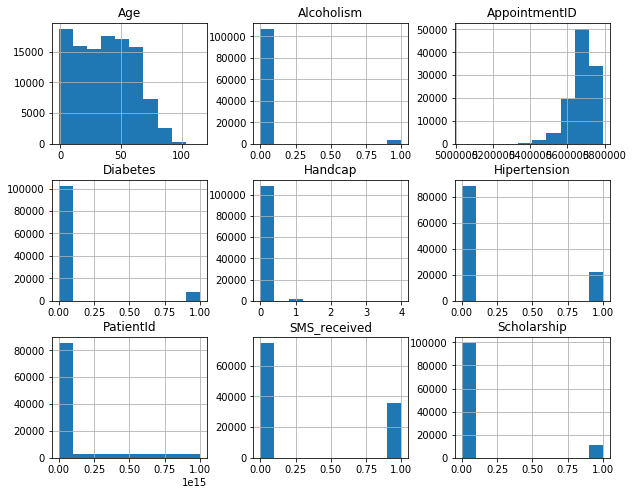

In [5]:
df.hist(figsize=(10,8))

### Data Cleaning
> Clean the data to locate and remove duplicate entries
> Trim columns to those that will be used in the analysis to reduce display clutter

In [6]:
# Load the CSV data into a DataFrame
df = pd.read_csv(r'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

# Check for duplicate AppointmentID
duplicate_appointments = df[df.duplicated('AppointmentID', keep=False)]

# Display any rows with duplicate AppointmentID
if not duplicate_appointments.empty:
    print("Rows with Duplicate AppointmentID:")
    print(duplicate_appointments)
    print("Removing Duplicate Entries...")
        # Remove duplicate entries based on 'AppointmentID'
    df = df.drop_duplicates(subset='AppointmentID', keep='first')
else:
    print("No Duplicate AppointmentID found.")

No Duplicate AppointmentID found.


In [7]:
# Dropping columns
df.drop(['PatientId', 'ScheduledDay', 'AppointmentDay', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'], axis=1, inplace=True)

# Display cleaned dataframe
df.head()


,AppointmentID,Gender,Age,Neighbourhood,No-show
0,5642903,F,62,JARDIM DA PENHA,No
1,5642503,M,56,JARDIM DA PENHA,No
2,5642549,F,62,MATA DA PRAIA,No
3,5642828,F,8,PONTAL DE CAMBURI,No
4,5642494,F,56,JARDIM DA PENHA,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:Does the location of the appoinment have any correlation to the number of patients that do not show for their appointments?
>There does not appear to be any correlation between location and number of no-shows based on the assessed data. The raw number of no-shows of some locations is relatively high compared to others, so to get a better idea of if location is a factor in no-shows I calculated the percentage of no-shows based on the appointments per location. This allowed for direct comparison of locations by finding the median value of percentage of no-shows. Median value was used instead of average value because there are 2 locations that have extreme values for no-show percentages (0% and 100%). 

>Upon analysis all locations but 2 have comparable no-show percentages which supports no direct correlation between location and number of no-shows overall.

In order to evaluate if location of the appointment has a strong correlation to the number of no show patients, the data should first be grouped by location, and show appointment count, no show count, and percentage of no shows for each location.

In [8]:
# Create function to group appointment count and no-show count for each location
def show_location_stats(df):
    # Group by Neighbourhood
    grouped_data = df.groupby('Neighbourhood')

    # Calculate appointment count, no-show count, and percentage of no-shows
    appointment_count = grouped_data['AppointmentID'].count()
    no_show_count = grouped_data['No-show'].apply(lambda x: (x == 'Yes').sum())
    percentage_no_show = (no_show_count / appointment_count) * 100

    # Create a new DataFrame to display the results
    result_df = pd.DataFrame({
        'Appointment Count': appointment_count,
        'No-show Count': no_show_count,
        'Percentage of No-shows': percentage_no_show
    })

    return result_df

In [9]:
# Call the function with the DataFrame
result_by_neighbourhood = show_location_stats(df)

# Display the result
print(result_by_neighbourhood)

                     Appointment Count  No-show Count  Percentage of No-shows
Neighbourhood                                                                
AEROPORTO                            8              1               12.500000
ANDORINHAS                        2262            521               23.032714
ANTÔNIO HONÓRIO                    271             50               18.450185
ARIOVALDO FAVALESSA                282             62               21.985816
BARRO VERMELHO                     423             91               21.513002
...                                ...            ...                     ...
SÃO JOSÉ                          1977            428               21.648963
SÃO PEDRO                         2448            515               21.037582
TABUAZEIRO                        3132            573               18.295019
UNIVERSITÁRIO                      152             32               21.052632
VILA RUBIM                         851            141           

To evaluate if there are any extreme values present that could skew analysis if not accounted for, we must find the minimum and maximum no show percentages within the data.

In [10]:
# Find and display the row with the lowest no-show percentage
lowest_no_show_location = result_by_neighbourhood['Percentage of No-shows'].idxmin()

print("Location with the Lowest No-show Percentage:")
print(result_by_neighbourhood.loc[lowest_no_show_location])

Location with the Lowest No-show Percentage:
Appointment Count         1.0
No-show Count             0.0
Percentage of No-shows    0.0
Name: PARQUE INDUSTRIAL, dtype: float64


In [11]:
# Find and display the row with the highest no-show percentage
highest_no_show_location = result_by_neighbourhood['Percentage of No-shows'].idxmax()

print("Location with the Highest No-show Percentage:")
print(result_by_neighbourhood.loc[highest_no_show_location])

Location with the Highest No-show Percentage:
Appointment Count           2.0
No-show Count               2.0
Percentage of No-shows    100.0
Name: ILHAS OCEÂNICAS DE TRINDADE, dtype: float64


Given the number of locations, the presence of extreme values and for ease of comparison visually a bar chart with a median line showing the percentage of no shows by location allows for easy visual evaluation of the analyzed data.
>There appears to be no strong correlation between location and no show percentages, this is concluded based on the determination that all locations but the 2 location with extreme values fall closely to the median percentage of no shows.

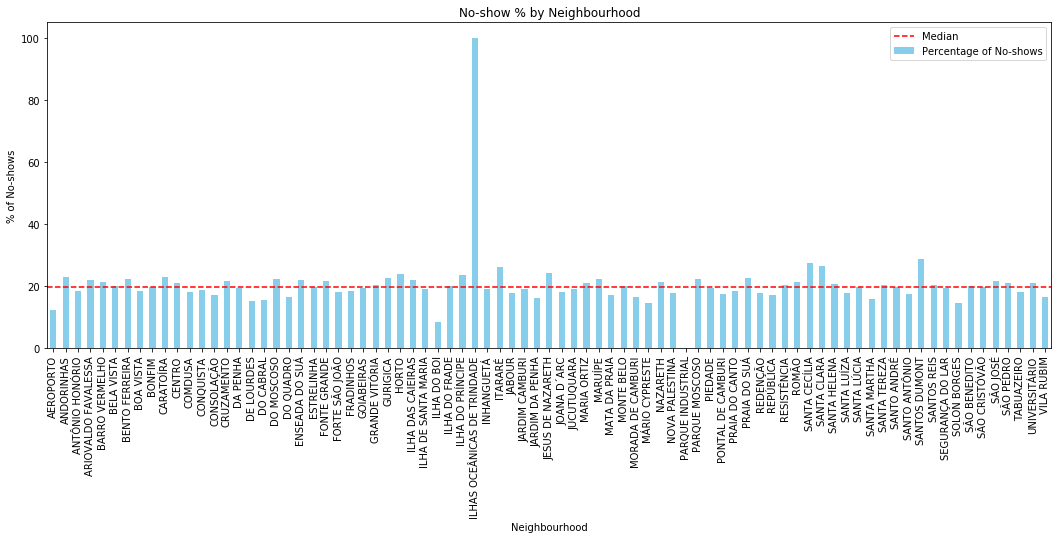

In [12]:
# Plotting the bar chart
fig, ax = plt.subplots(figsize=(18, 6))
result_by_neighbourhood['Percentage of No-shows'].plot(kind='bar', color='skyblue', ax=ax)
plt.title('No-show % by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('% of No-shows')
plt.xticks(rotation=90)

# Add a median line
median_percentage = result_by_neighbourhood['Percentage of No-shows'].median()
ax.axhline(y=median_percentage, color='red', linestyle='--', label='Median')

plt.legend()
plt.show()

### Research Question 2: Is there a particular age group that is more likely to not show for their appointment? If so is there any correlation to gender of the patient?
> Based on the data analyzed there appears to be a correlation between age of the patient and if they no-show for their appointment. The analysis shows patients in the 3 age groups under the age of 35 are above the average percentage for no-show appointments as compared to their counterparts.The age group with the highest percentage of no-shows is the 18-24 age group with 25-34 being second, and 0-17 being third.
> Based on analysis of the no-show percentages based on gender within each age group, females typically no-show at a higher rate (< 1% higher) across all agre groups except the 18-24 age group where males no-show at a rate that is ~1.2% higher than females.

>This allows us to conclude that males in the 18-24 age group are the most likely patients to no-show to appointments.

In order to evaluate if patient age has a strong correlation to the number of no show patients, the age groups must be defined and created.

In [13]:
# Function to create age groups
def create_age_groups(df):
    bins = [0, 17, 24, 34, 50, 64, float('inf')]
    labels = ['0-17', '18-24', '25-34', '35-50', '51-64', '65+']
    df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    return df

In [14]:
# Create age groups
df = create_age_groups(df)

# Group by Age Group
age_groups = df.groupby('Age Group')

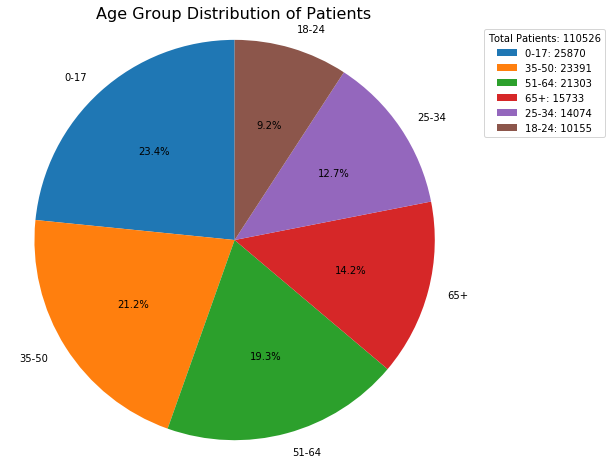

In [15]:
# Group by age group and count the occurrences
age_group_counts = df['Age Group'].value_counts()

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a legend with total counts for each age group
total_counts = age_group_counts.sum()
legend_labels = [f'{label}: {count}' for label, count in zip(age_group_counts.index, age_group_counts)]
ax.legend(legend_labels, title=f'Total Patients: {total_counts}', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the aspect ratio to be equal for a circular pie chart
ax.axis('equal')

# Add chart title
plt.title('Age Group Distribution of Patients', fontsize=16)

# Show the pie chart
plt.show()

After defining the age groups, the percentage of no shows for each age group must be evaluated.

In [16]:
# Function to show no-show percentage by age group
def show_no_show_by_age(df):
    # Calculate appointment count, no-show count, and percentage of no-shows
    appointment_count = age_groups['AppointmentID'].count()
    no_show_count = age_groups['No-show'].apply(lambda x: (x == 'Yes').sum())
    percentage_no_show = (no_show_count / appointment_count) * 100

    # Create a new DataFrame to display the results
    result_df = pd.DataFrame({
        'Percentage of No-shows': percentage_no_show
    })

    return result_df

In [17]:
# Call the function to analyze by age groups
result_by_age = show_no_show_by_age(df)

# Print the result
print(result_by_age)

           Percentage of No-shows
Age Group                        
0-17                    21.650560
18-24                   25.051699
25-34                   23.760125
35-50                   20.572015
51-64                   16.913111
65+                     15.349901


For visual presentation of the findings a line graph with an average line (since there are no extreme values present) allows for the correlation between age group and no show percentage to be easily seen.

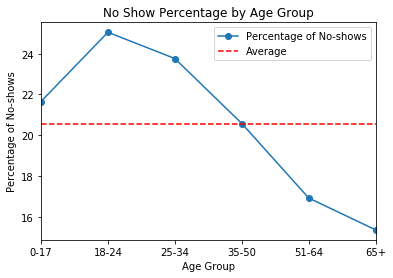

In [18]:
# Create line graph with average line
ax = result_by_age.plot(kind='line', marker='o', label='No Show Percentage')
average_percentage = result_by_age['Percentage of No-shows'].mean()
plt.axhline(y=average_percentage, color='r', linestyle='--', label='Average')
plt.title('No Show Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of No-shows')
plt.legend()
plt.show()

Upon reviewing the No Show Percentage by Age Group and seeing that there is correlation between age group and no show percentage, further analysis of gender distribution of the patients in the age groups allows for more accurate understanding of the patient demographic that is historically more likely to no show based on these 2 factors.

>To evaluate any correlation between gender within the age groups to no show, first the gender distribution of patients (overall percentage for a general view of patient distribution, shown in a pie chart and by age group in a bar chart for comparison with no show analysis) needs to be found.

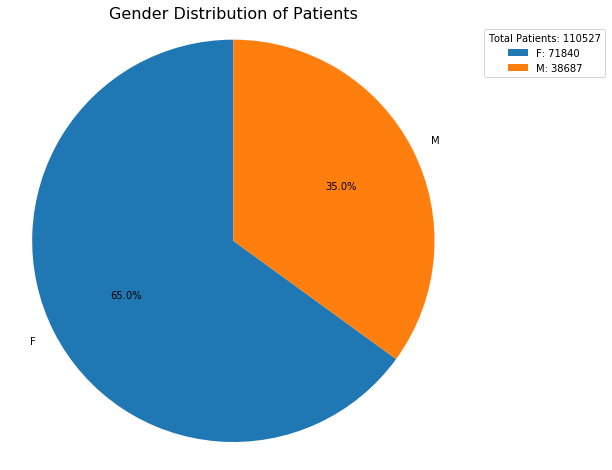

In [19]:
# Group by gender and count the occurrences
gender_counts = df['Gender'].value_counts()

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a legend with total counts for each age group
total_counts = gender_counts.sum()
legend_labels = [f'{label}: {count}' for label, count in zip(gender_counts.index, gender_counts)]
ax.legend(legend_labels, title=f'Total Patients: {total_counts}', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the aspect ratio to be equal for a circular pie chart
ax.axis('equal')

# Add chart title
plt.title('Gender Distribution of Patients', fontsize=16)

# Show the pie chart
plt.show()

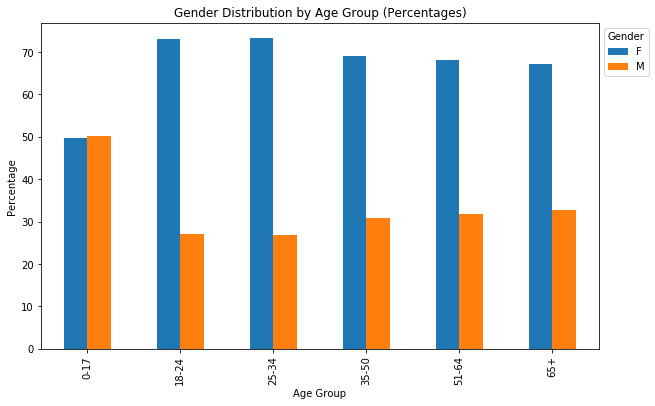

In [20]:
# Group by Age Group and Gender, and calculate percentages
grouped_data = df.groupby(['Age Group', 'Gender']).size().unstack()
grouped_data_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting the side-by-side bar chart with percentages (unstacked)
ax = grouped_data_percentages.plot(kind='bar', figsize=(10, 6), stacked=False)

# Add labels and title
ax.set_title('Gender Distribution by Age Group (Percentages)')
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage')
ax.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))

# Show the bar chart
plt.show()

The above graphs showed that females make up the vast majority of patients overall and in each age group outside of the 0-17 age group. Evaluation on possible gender correlation with no show percentages should be performed across all age groups to identify possible trends.

No show percentage by gender and age group comparison requires the no show percentage for each gender in each age group to be found, this is done so by the below function.

In [21]:
# Function to show appointment stats by age group and gender
def show_stats_by_gender_and_age(df):
    # Create age groups
    df = create_age_groups(df)

    # Group by Age Group and Gender
    grouped_data = df.groupby(['Age Group', 'Gender'])

    # Calculate appointment count, no-show count, and percentage of no-shows
    appointment_count = grouped_data['AppointmentID'].count()
    no_show_count = grouped_data['No-show'].apply(lambda x: (x == 'Yes').sum())
    percentage_no_show = (no_show_count / appointment_count) * 100

    # Create a new DataFrame to display the results
    result_df = pd.DataFrame({
        'Percentage of No-shows': percentage_no_show
    }).reset_index()

    return result_df

In [22]:
# Call the function to analyze by gender and age groups
result_by_age_and_gender = show_stats_by_gender_and_age(df)

# Display the result
print(result_by_age_and_gender)

   Age Group Gender  Percentage of No-shows
0       0-17      F               21.846847
1       0-17      M               21.456057
2      18-24      F               24.736842
3      18-24      M               25.901639
4      25-34      F               23.843244
5      25-34      M               23.532537
6      35-50      F               20.791037
7      35-50      M               20.082930
8      51-64      F               17.091485
9      51-64      M               16.531605
10       65+      F               15.607264
11       65+      M               14.822709


For ease of comparision a bar chart showing the no show percentages of each gender in each age group should be generated.

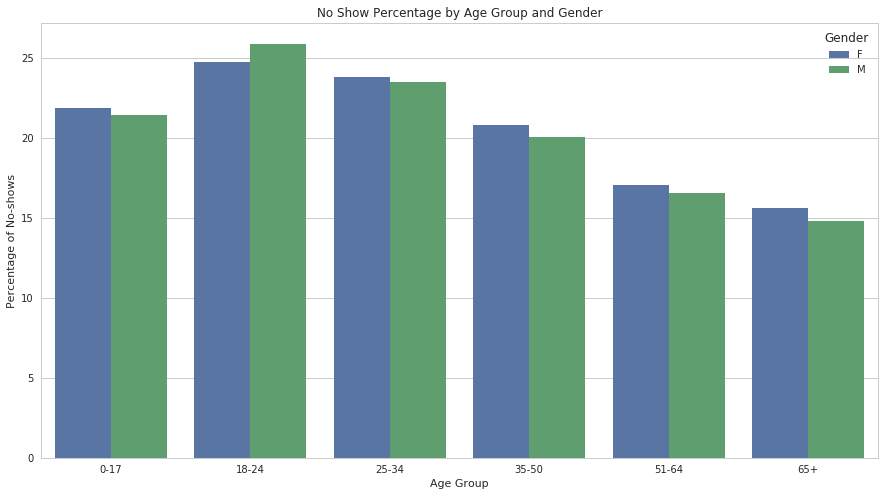

In [23]:
# Create stackplot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

sns.barplot(x='Age Group', y='Percentage of No-shows', hue='Gender', data=result_by_age_and_gender, ci=None)

plt.title('No Show Percentage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Percentage of No-shows')
plt.legend(title='Gender', loc='upper right')
plt.show()

Based on the above analysis there does appear to be not only a strong correlation between age and no show percentage but the gender of the patient also is a factor. Female patients tend to no show at a slightly higher percentage in all but 1 age group, 18-24. This age group also has the highest percentage of no shows overall, so given these factors it can be concluded that patients that are male and between the ages 18-24 are historically the most likely to no show for appointments.

<a id='conclusions'></a>
## Conclusions

>Based on the data analyzed there appears to be no strong correlation between the location of the clinic (seen as "Neighbourhood" in the dataframes) and no show appointments as the locations fell close to or below the median line for no-show with few locations falling significantly below the median line. Those that fall significantly below could be further analyzed to determine possible causes for the low no-show percentages. The two major exceptions to this had no-show percentages of 100% and 0%, these locations had extremely low appointment counts which caused a skewed percentage of no-shows.

>There does appear to be a strong correlation between age group and no-show percentages, with the 18-24 age group having the highest percentage of no-shows. Upon exploring patient demographics further it was determined even though the majority of patients are female, and females greatly outnumber males in each age group other than the 0-17 age group, the no show percentage of females is not substantially higher than males in any age group (< 1% in each age group). It was discovered that the 18-24 year old males no-show at a higher rate than their female counterparts (at roughly a 1.2% higher rate) and at a higher rate than males in other age groups.

>Further analysis of the data should be done to determine other key factors in no-show appointments and a deeper analysis of each locations individual no-show data can be done to find potential factors used to predict if patients at that particular location have a higher chance of no-showing based on certain factors that do not impact no-shows at other locations to more accurately assess the no-show risk of patients.